In [ ]:
#Import Needed Libraries
import io,pandas as pd,numpy as np,matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
from functools import reduce
#Set the Dataframe display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Step 1: Uploading ABS_CBN Tally to google colab
from google.colab import files
abs_cbn = files.upload()

Saving ABS_CBN_tally.csv to ABS_CBN_tally (1).csv


In [ ]:
#Step 2: Uploading GMA Tally to google colab
from google.colab import files
gma = files.upload()

Saving GMA_tally.csv to GMA_tally (1).csv


In [ ]:
#Step 3:Uploading Juterte Tally to google colab
from google.colab import files
duterte = files.upload()

Saving duterte_tally.csv to duterte_tally (1).csv


In [ ]:
#Step 4:Uploading Roxas Tally to google colab
from google.colab import files
roxas = files.upload()

Saving roxas_tally.csv to roxas_tally (1).csv


In [ ]:
#Step 5:Uploading Community Tally to google colab
from google.colab import files
community = files.upload()

Saving community_tally.csv to community_tally (1).csv


In [ ]:
#Step 6: Create a mapping functions to convert the month name into corresponding integer
month = {"February":2,"March":3,"April":4,"May":5}
#Step 7: Read each uploaded file into dataframes, add suffix depending on which tally, and map the months, create a new column called year, and create date stamp
df1 = pd.read_csv(io.BytesIO(abs_cbn['ABS_CBN_tally.csv']))
df1 = df1.add_suffix('_abscbn')
df1.Month_abscbn = df1.Month_abscbn.map(month)
df1['Year_abscbn']=int('2016')
df1['Date'] = df1.apply(lambda row: datetime(row['Year_abscbn'], row['Month_abscbn'], row['Day_abscbn']), axis=1)

df2 = pd.read_csv(io.BytesIO(gma['GMA_tally.csv']))
df2 = df2.add_suffix('_gma')
df2.Month_gma = df2.Month_gma.map(month)
df2['Year_gma']=int('2016')
df2 = df2.dropna()
df2 = df2.astype("int64")
df2['Date'] = df2.apply(lambda row: datetime(row['Year_gma'], row['Month_gma'], row['Day_gma']), axis=1)

df3 = pd.read_csv(io.BytesIO(duterte['duterte_tally.csv']))
df3 = df3.add_suffix('_duterte')
df3.Month_duterte = df3.Month_duterte.map(month)
df3['Year_duterte']=int('2016')
df3['Date'] = df3.apply(lambda row: datetime(row['Year_duterte'], row['Month_duterte'], row['DAY_duterte']), axis=1)

df4 = pd.read_csv(io.BytesIO(roxas['roxas_tally.csv']))
df4 = df4.add_suffix('_roxas')
df4.Month_roxas = df4.Month_roxas.map(month)
df4['Year_roxas']=int('2016')
df4['Date'] = df4.apply(lambda row: datetime(row['Year_roxas'], row['Month_roxas'], row['DAY_roxas']), axis=1)

df5 = pd.read_csv(io.BytesIO(community['community_tally.csv']))
df5 = df5.add_suffix('_community')
df5.Month_community = df5.Month_community.map(month)
df5['Year_community']=int('2016')
df5 = df5.dropna()
df5 = df5.astype("int64")
df5['Date'] = df5.apply(lambda row: datetime(row['Year_community'], row['Month_community'], row['Day_community']), axis=1)

In [ ]:
#Step 8: Merge all the dataframes, check for the number of nulls in each columns, and delete the nulls, set the Dates as the index of the rows
#Nulls occur because some dates are present on some of the dataframes and not on other dataframes, we need to delete the nulls to have consisten dates as point of reference
df = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [df1, df2, df3,df4,df5])
print(df.isnull().sum())
df = df.dropna()
df.set_index('Date',inplace=True)
print(df)

Month_abscbn                    0
ID_abscbn                       0
Day_abscbn                      0
Issue_abscbn                    0
Candidate_abscbn                0
                               ..
Gender 11_community             5
Science 12_community            5
Election PSA 13_community       5
Election Issues 14_community    5
Year_community                  5
Length: 136, dtype: int64
            Month_abscbn  ID_abscbn  Day_abscbn  Issue_abscbn  Candidate_abscbn  Total Actual Post_abscbn  Economics1 _abscbn  Foreign 2_abscbn  Government 3_abscbn  Law 4_abscbn  Social 5_abscbn  Election 6_abscbn  Business 1_abscbn  Welfare 2_abscbn  China 3_abscbn  US 4_abscbn  Policy 5_abscbn  Finance 6_abscbn  Crime 7_abscbn  Public 8_abscbn  Corruption 9_abscbn  Terrorism 10_abscbn  Gender 11_abscbn  Science 12_abscbn  Election PSA 13_abscbn  Election Issues 14_abscbn  Duterte_abscbn  Political 1_abscbn  Qualifications 2_abscbn  Personality 3_abscbn  Integrity 4_abscbn  Positive_abscbn  

In [ ]:
#Step 9: Drop unneccessary columns,drop Columns with zeroes occupying more than 50% (to avoid having none-positive definite matrix)
df =df.drop(columns=['Month_abscbn', 'ID_abscbn', 'Day_abscbn', 'Issue_abscbn', 'Candidate_abscbn', 'Total Actual Post_abscbn','Positive_abscbn', 'Negative_abscbn', 'Neutral_abscbn', 'Positive.1_abscbn', 'Negative.1_abscbn', 'Neutral.1_abscbn', 'Year_abscbn', 'Month_gma', 'Day_gma', 'Issue_gma', 'Candidate_gma', 'Total Actual Post_gma', 'Positive_gma', 'Negative_gma', 'Neutral_gma', 'Positive.1_gma', 'Negative.1_gma', 'Neutral.1_gma', 'Year_gma', 'Month_duterte', 'ID_duterte', 'DAY_duterte', 'Positive_duterte', 'Negative_duterte', 'Neutral_duterte', 'Year_duterte', 'Month_roxas', 'ID_roxas', 'DAY_roxas', 'Positive_roxas', 'Negative_roxas', 'Neutral_roxas', 'Year_roxas', 'Month_community', 'ID_community', 'Day_community', 'Total Actual Post_community', 'Year_community'], axis=1)
cols_drop = []
drop_cols = df.columns[(df == 0).sum() > 0.50*df.shape[1]]
for i in drop_cols:
  cols_drop.append(str(i))
print(cols_drop)
df = df.drop(columns = drop_cols, axis = 1)
print(df)

['Welfare 2_abscbn', 'China 3_abscbn', 'US 4_abscbn', 'Policy 5_abscbn', 'Finance 6_abscbn', 'Terrorism 10_abscbn', 'Science 12_abscbn', 'Political 1_abscbn', 'Qualifications 2_abscbn', 'Integrity 4_abscbn', 'Political_abscbn', 'Qualifications_abscbn', 'Integrity_abscbn', 'Foreign 2_gma', 'Government 3_gma', 'Welfare 2_gma', 'China 3_gma', 'US 4_gma', 'Policy 5_gma', 'Finance 6_gma', 'Terrorism 10_gma', 'Gender 11_gma', 'Science 12_gma', 'Political 1_gma', 'Qualifications 2_gma', 'Integrity 4_gma', 'Political_gma', 'Qualifications_gma', 'Personality_gma', 'Integrity_gma', 'Political 1_duterte', 'Qualifications 2_duterte', 'Integrity 4_duterte', 'Quali_roxas', 'Integrity_roxas', 'Foreign 2_community', 'Election 6_community', 'China 3_community', 'US 4_community', 'Corruption 9_community', 'Terrorism 10_community', 'Gender 11_community', 'Election PSA 13_community', 'Election Issues 14_community']
            Economics1 _abscbn  Foreign 2_abscbn  Government 3_abscbn  Law 4_abscbn  Social

IndexError: ignored

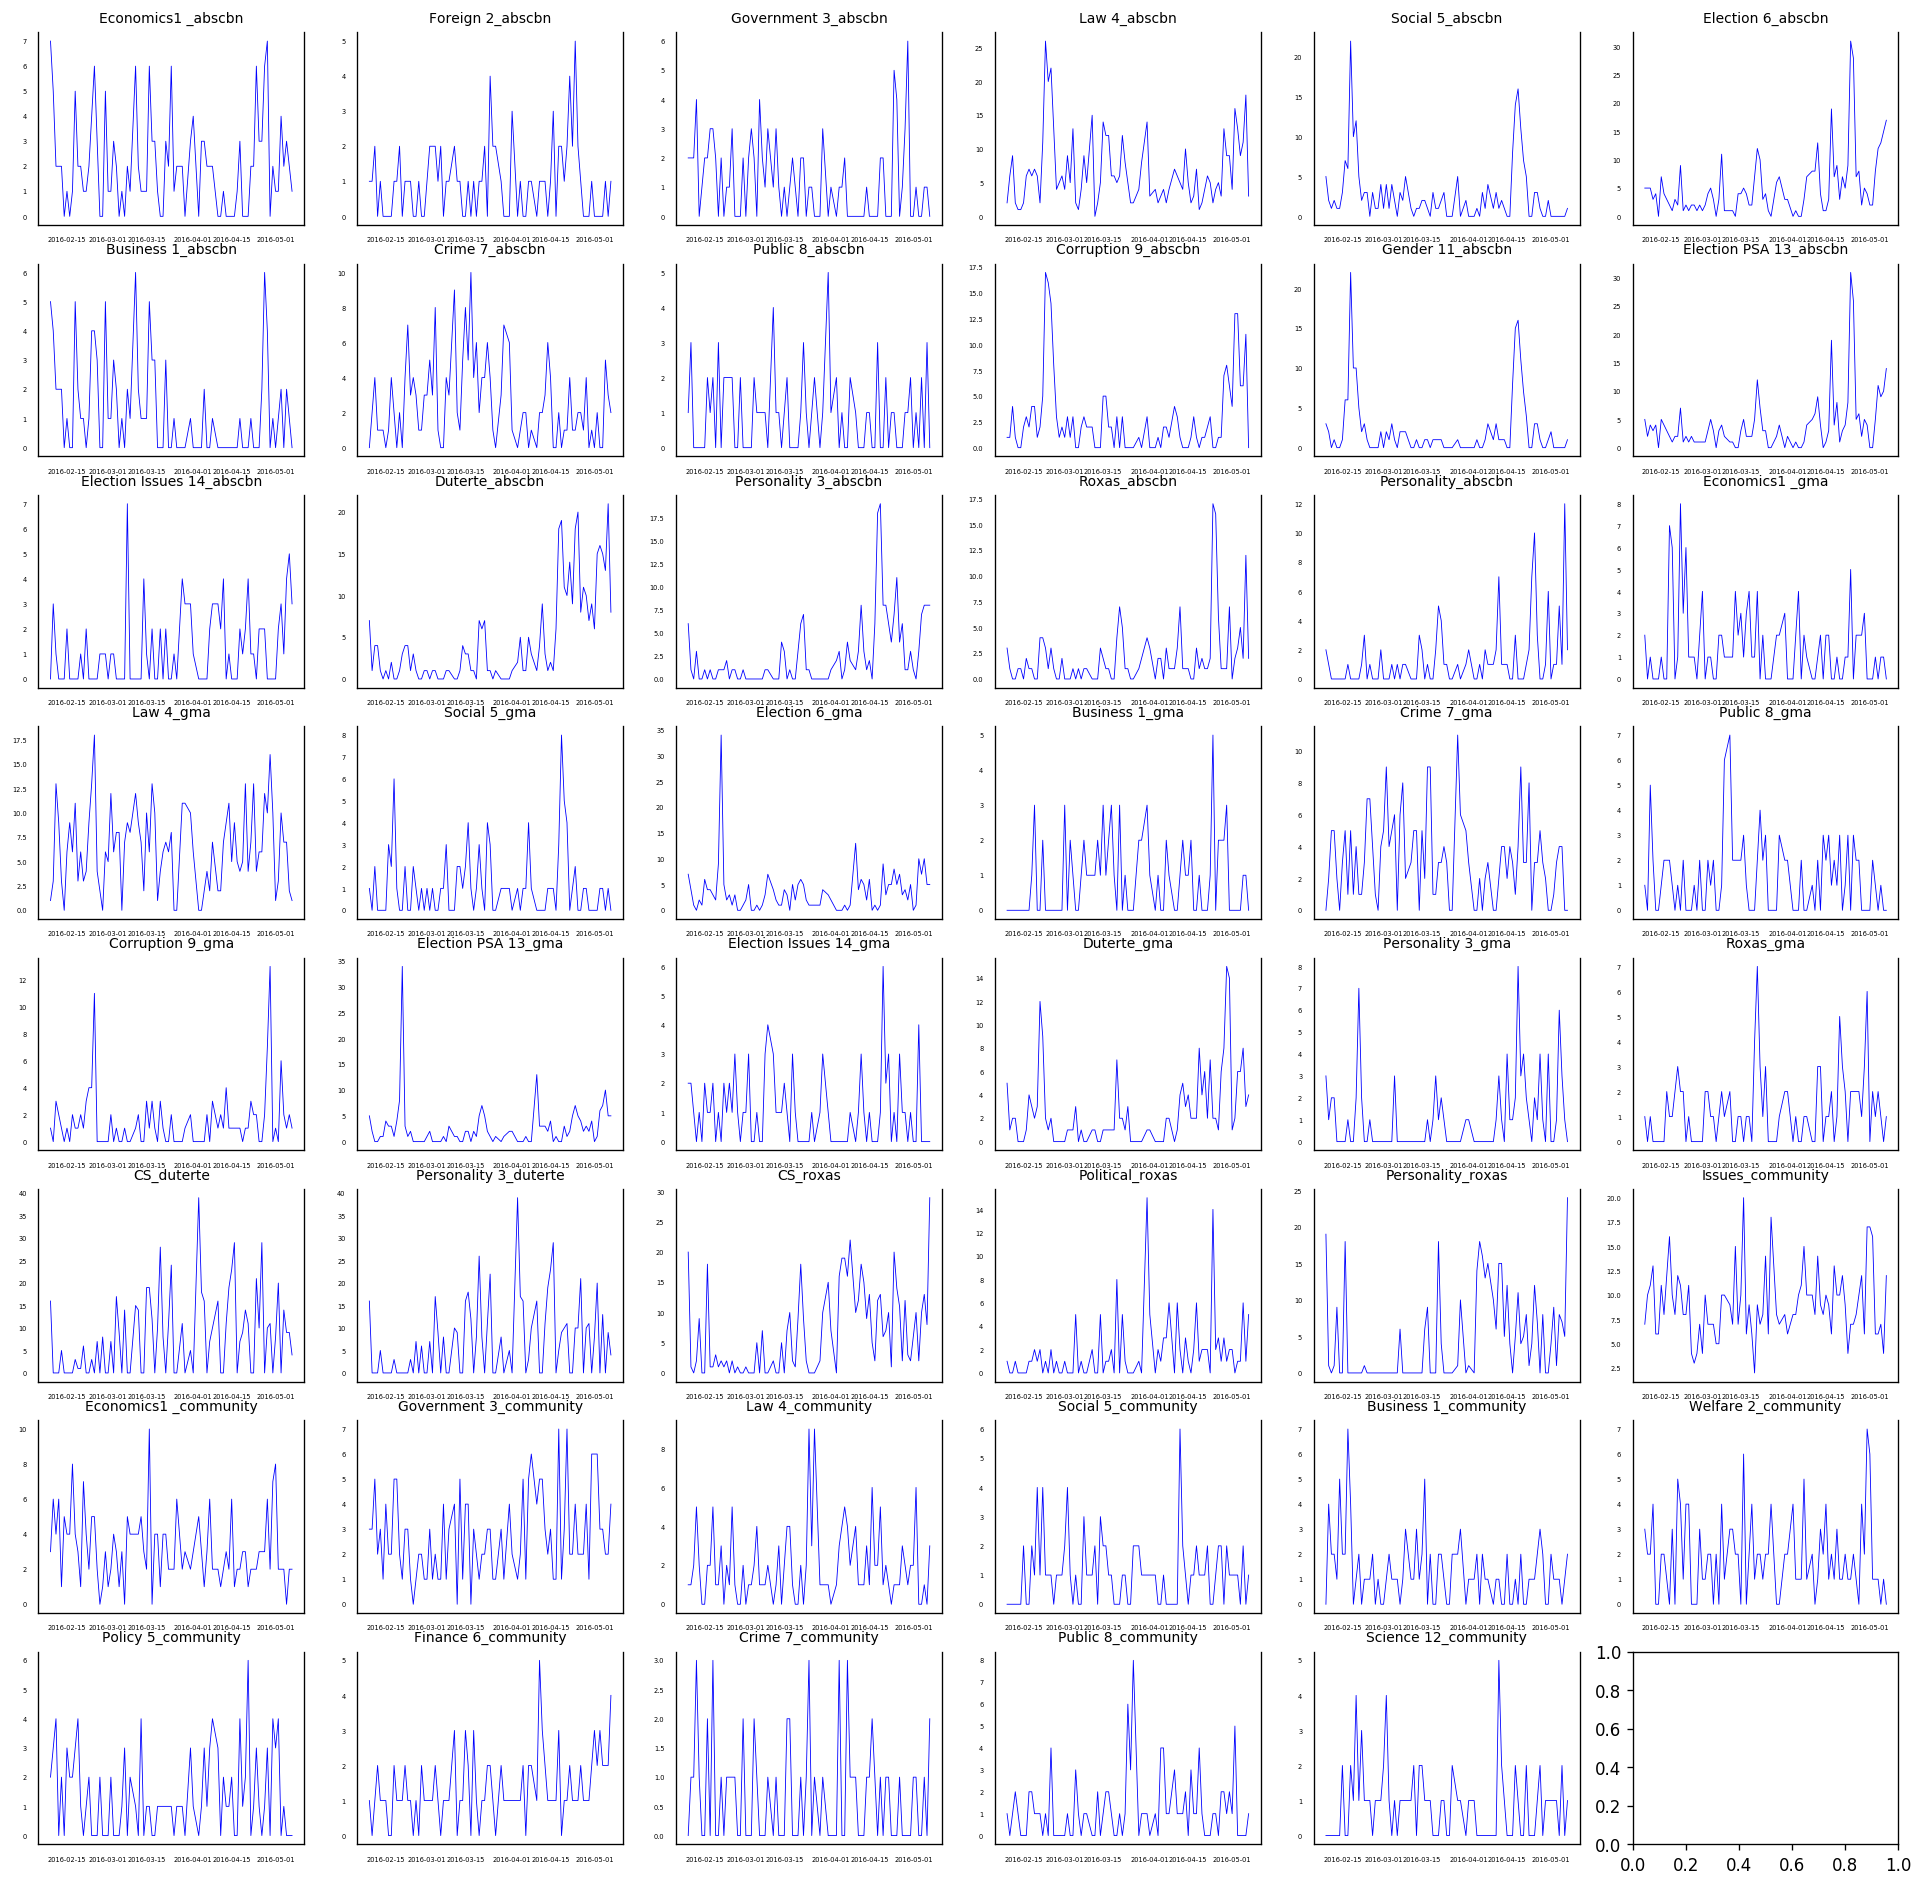

In [ ]:
# Step 10: Visualize the series
fig, axes = plt.subplots(nrows=8, ncols=6, dpi=120, figsize=(20,20))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)

plt.tight_layout();

In [ ]:
#Step 11: Drop duplicate columns and determine correlated values (To avoid singular matrix)
#Duplicate columns will result to a perfect correlation score of 1.0, resulting in a singular matrix.
#We may also have 2 features that are perfectly correlated resulting in a singular matrix.
#Singular Matrix arises due to the perfect correlation between the two time series in the data.
#Internally a Wald test is used to compute the maximum likelihood estimates for the parameters of the lag-time series.
#To do this an estimate of the parameters covariance matrix (which is then near-zero in highly correlated data)
#and its inverse is needed (as you can also see in the line invcov = np.linalg.inv(cov_p) in the sourcecode).
#This near-zero matrix is now singular for some maximum lag number and thus the whole test crashes.
correlated_features = []
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

print('Number of Correlated Fetaures:')
print(len(correlated_features))
print('Correlated Variables')
print(correlated_features)
df = df.drop(columns=correlated_features)
df = df.loc[:,~df.columns.duplicated()]
print(list(df))

Number of Correlated Fetaures:
11
Correlated Variables
['Corruption 9_abscbn', 'Gender 11_abscbn', 'Election PSA 13_abscbn', 'Personality 3_abscbn', 'Personality_abscbn', 'Election PSA 13_gma', 'Personality 3_duterte', 'Personality_roxas', 'Policy 5_community', 'Public 8_community', 'Science 12_community']
['Economics1 _abscbn', 'Foreign 2_abscbn', 'Government 3_abscbn', 'Law 4_abscbn', 'Social 5_abscbn', 'Election 6_abscbn', 'Business 1_abscbn', 'Crime 7_abscbn', 'Public 8_abscbn', 'Election Issues 14_abscbn', 'Duterte_abscbn', 'Roxas_abscbn', 'Economics1 _gma', 'Law 4_gma', 'Social 5_gma', 'Election 6_gma', 'Business 1_gma', 'Crime 7_gma', 'Public 8_gma', 'Corruption 9_gma', 'Election Issues 14_gma', 'Duterte_gma', 'Personality 3_gma', 'Roxas_gma', 'CS_duterte', 'CS_roxas', 'Political_roxas', 'Issues_community', 'Economics1 _community', 'Government 3_community', 'Law 4_community', 'Social 5_community', 'Business 1_community', 'Welfare 2_community', 'Finance 6_community', 'Crime 7_com

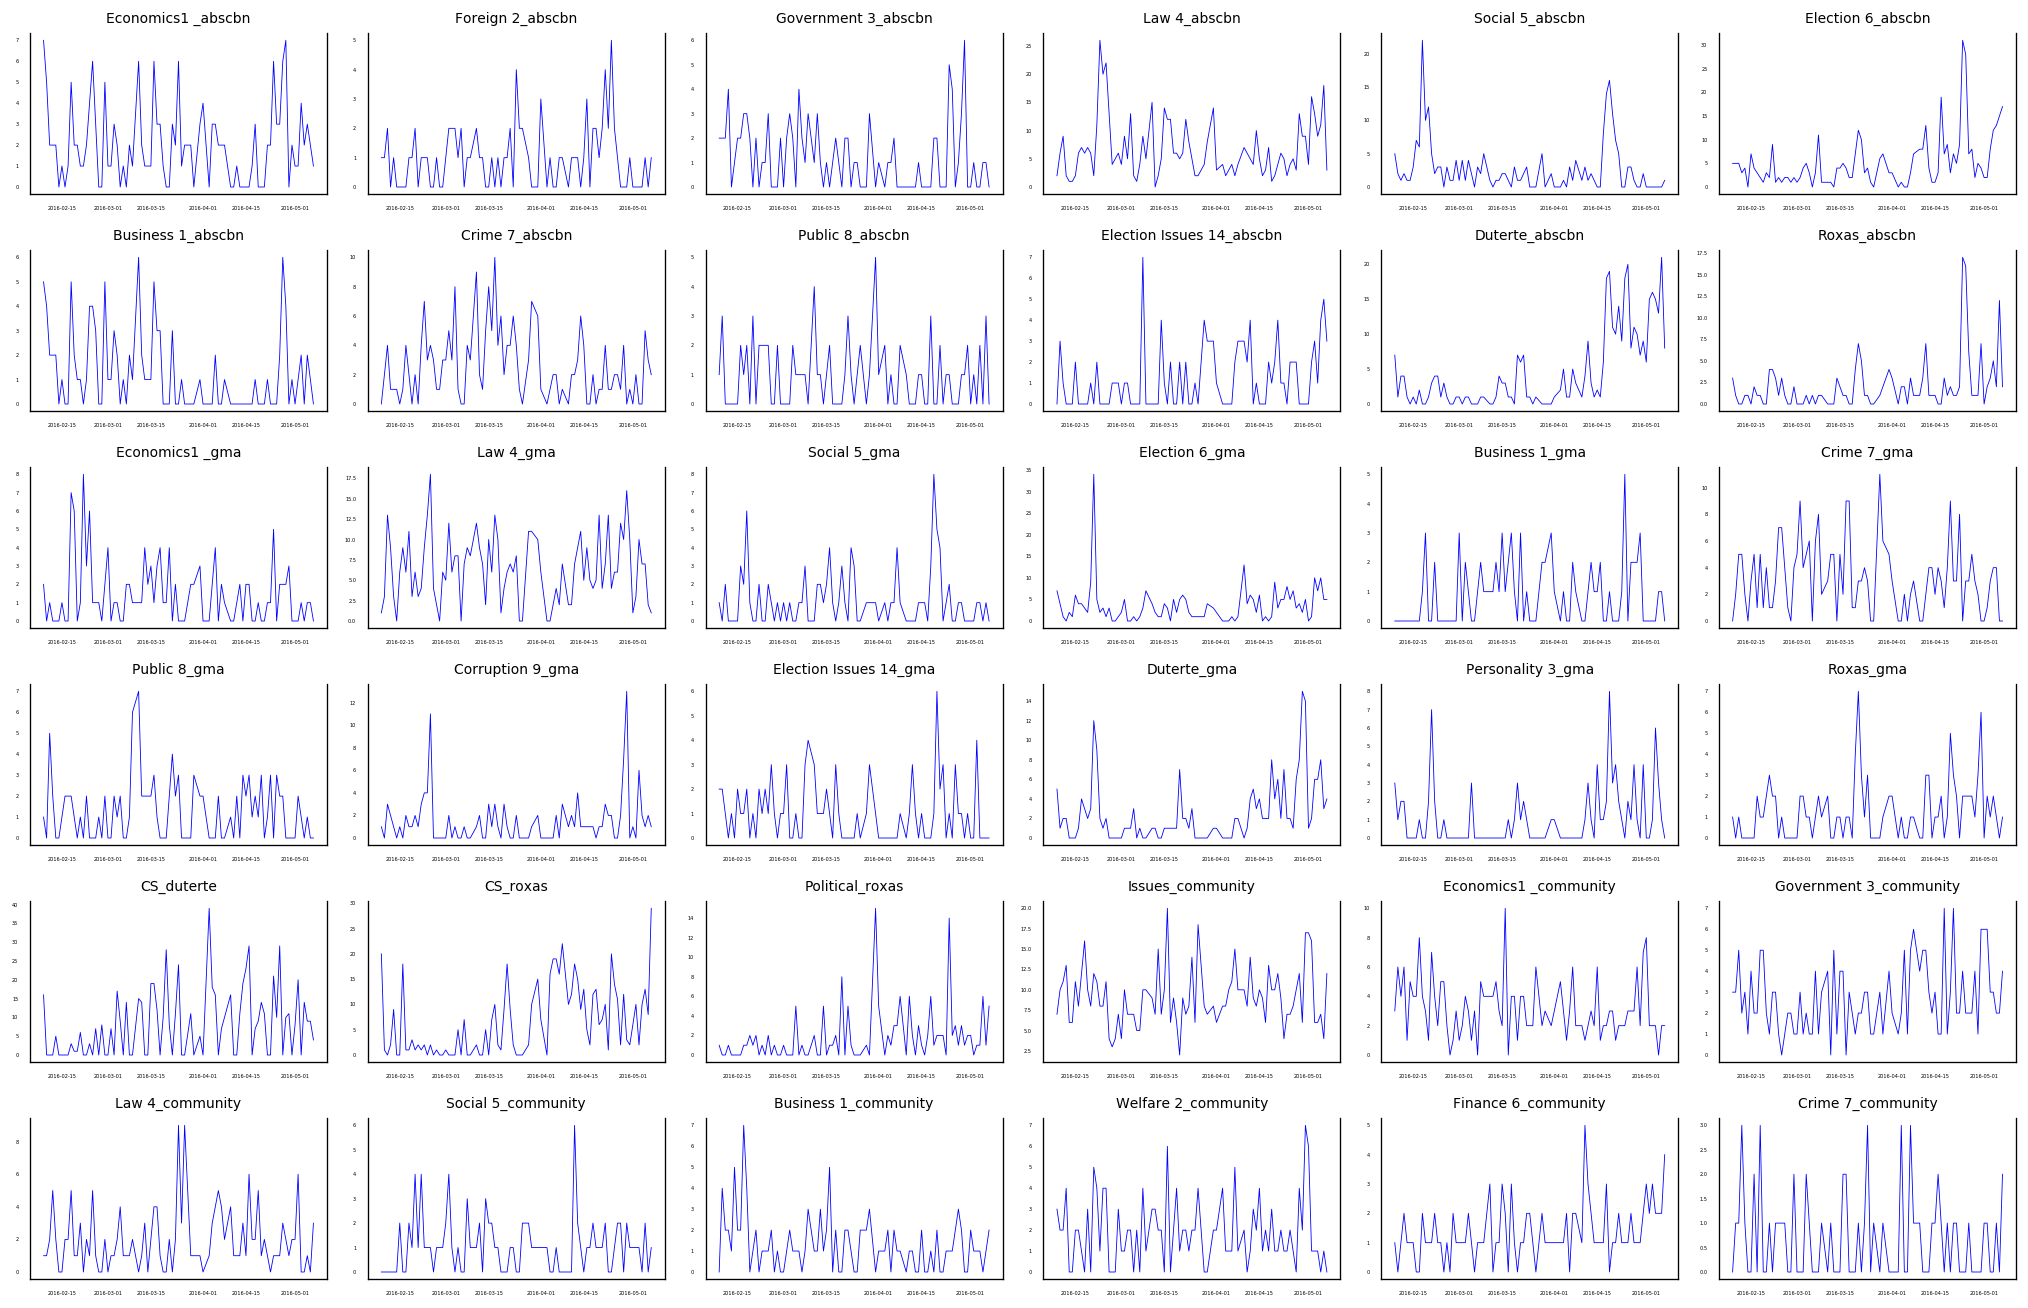

In [ ]:
# Step 12: Visualize the new series
fig, axes = plt.subplots(nrows=6, ncols=6, dpi=120, figsize=(17,11))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=3)

plt.tight_layout();

In [ ]:
#Step 13: Create a Augmented Dickey Fuller Test
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
#Step 14: Determine if there is none stationary time series
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Economics1 _abscbn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4861
 No. Lags Chosen       = 0
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Foreign 2_abscbn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0847
 No. Lags Chosen       = 1
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Government 3_abscbn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

In [ ]:
#Step 15: 1st difference
df_differenced = df.diff().dropna()

In [ ]:
# Resting on 1st Differences
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Economics1 _abscbn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6509
 No. Lags Chosen       = 4
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Foreign 2_abscbn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.66
 No. Lags Chosen       = 11
 Critical value 1%     = -3.526
 Critical value 5%     = -2.903
 Critical value 10%    = -2.589
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Government 3_abscbn" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

In [ ]:
cols_drop = []
drop_cols = df_differenced.columns[(df_differenced == 0).sum() > 0.50*df_differenced.shape[1]]
for i in drop_cols:
  cols_drop.append(str(i))
print(cols_drop)
df_differenced = df_differenced.drop(columns = drop_cols, axis = 1)
print(df_differenced)

['Economics1 _abscbn', 'Foreign 2_abscbn', 'Government 3_abscbn', 'Business 1_abscbn', 'Public 8_abscbn', 'Election Issues 14_abscbn', 'Roxas_abscbn', 'Economics1 _gma', 'Social 5_gma', 'Business 1_gma', 'Public 8_gma', 'Corruption 9_gma', 'Election Issues 14_gma', 'Duterte_gma', 'Personality 3_gma', 'Roxas_gma', 'Government 3_community', 'Law 4_community', 'Social 5_community', 'Business 1_community', 'Welfare 2_community', 'Finance 6_community', 'Crime 7_community']
            Law 4_abscbn  Social 5_abscbn  Election 6_abscbn  Crime 7_abscbn  Duterte_abscbn  Law 4_gma  Election 6_gma  Crime 7_gma  CS_duterte  CS_roxas  Political_roxas  Issues_community  Economics1 _community
Date                                                                                                                                                                                                                
2016-02-10  4.0          -3.0              0.0                2.0            -6.0             2.0    

In [ ]:
correlated_features = []
correlation_matrix = df_differenced.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
print('Number of Correlated Features:')
print(len(correlated_features))
print('Correlated Variables')
print(correlated_features)
df_differenced = df_differenced.drop(columns=correlated_features)
df_differenced = df_differenced.loc[:,~df_differenced.columns.duplicated()]
print(list(df_differenced))

Number of Correlated Features:
1
Correlated Variables
['Crime 7_gma']
['Law 4_abscbn', 'Social 5_abscbn', 'Election 6_abscbn', 'Crime 7_abscbn', 'Duterte_abscbn', 'Law 4_gma', 'Election 6_gma', 'CS_duterte', 'CS_roxas', 'Political_roxas', 'Issues_community', 'Economics1 _community']


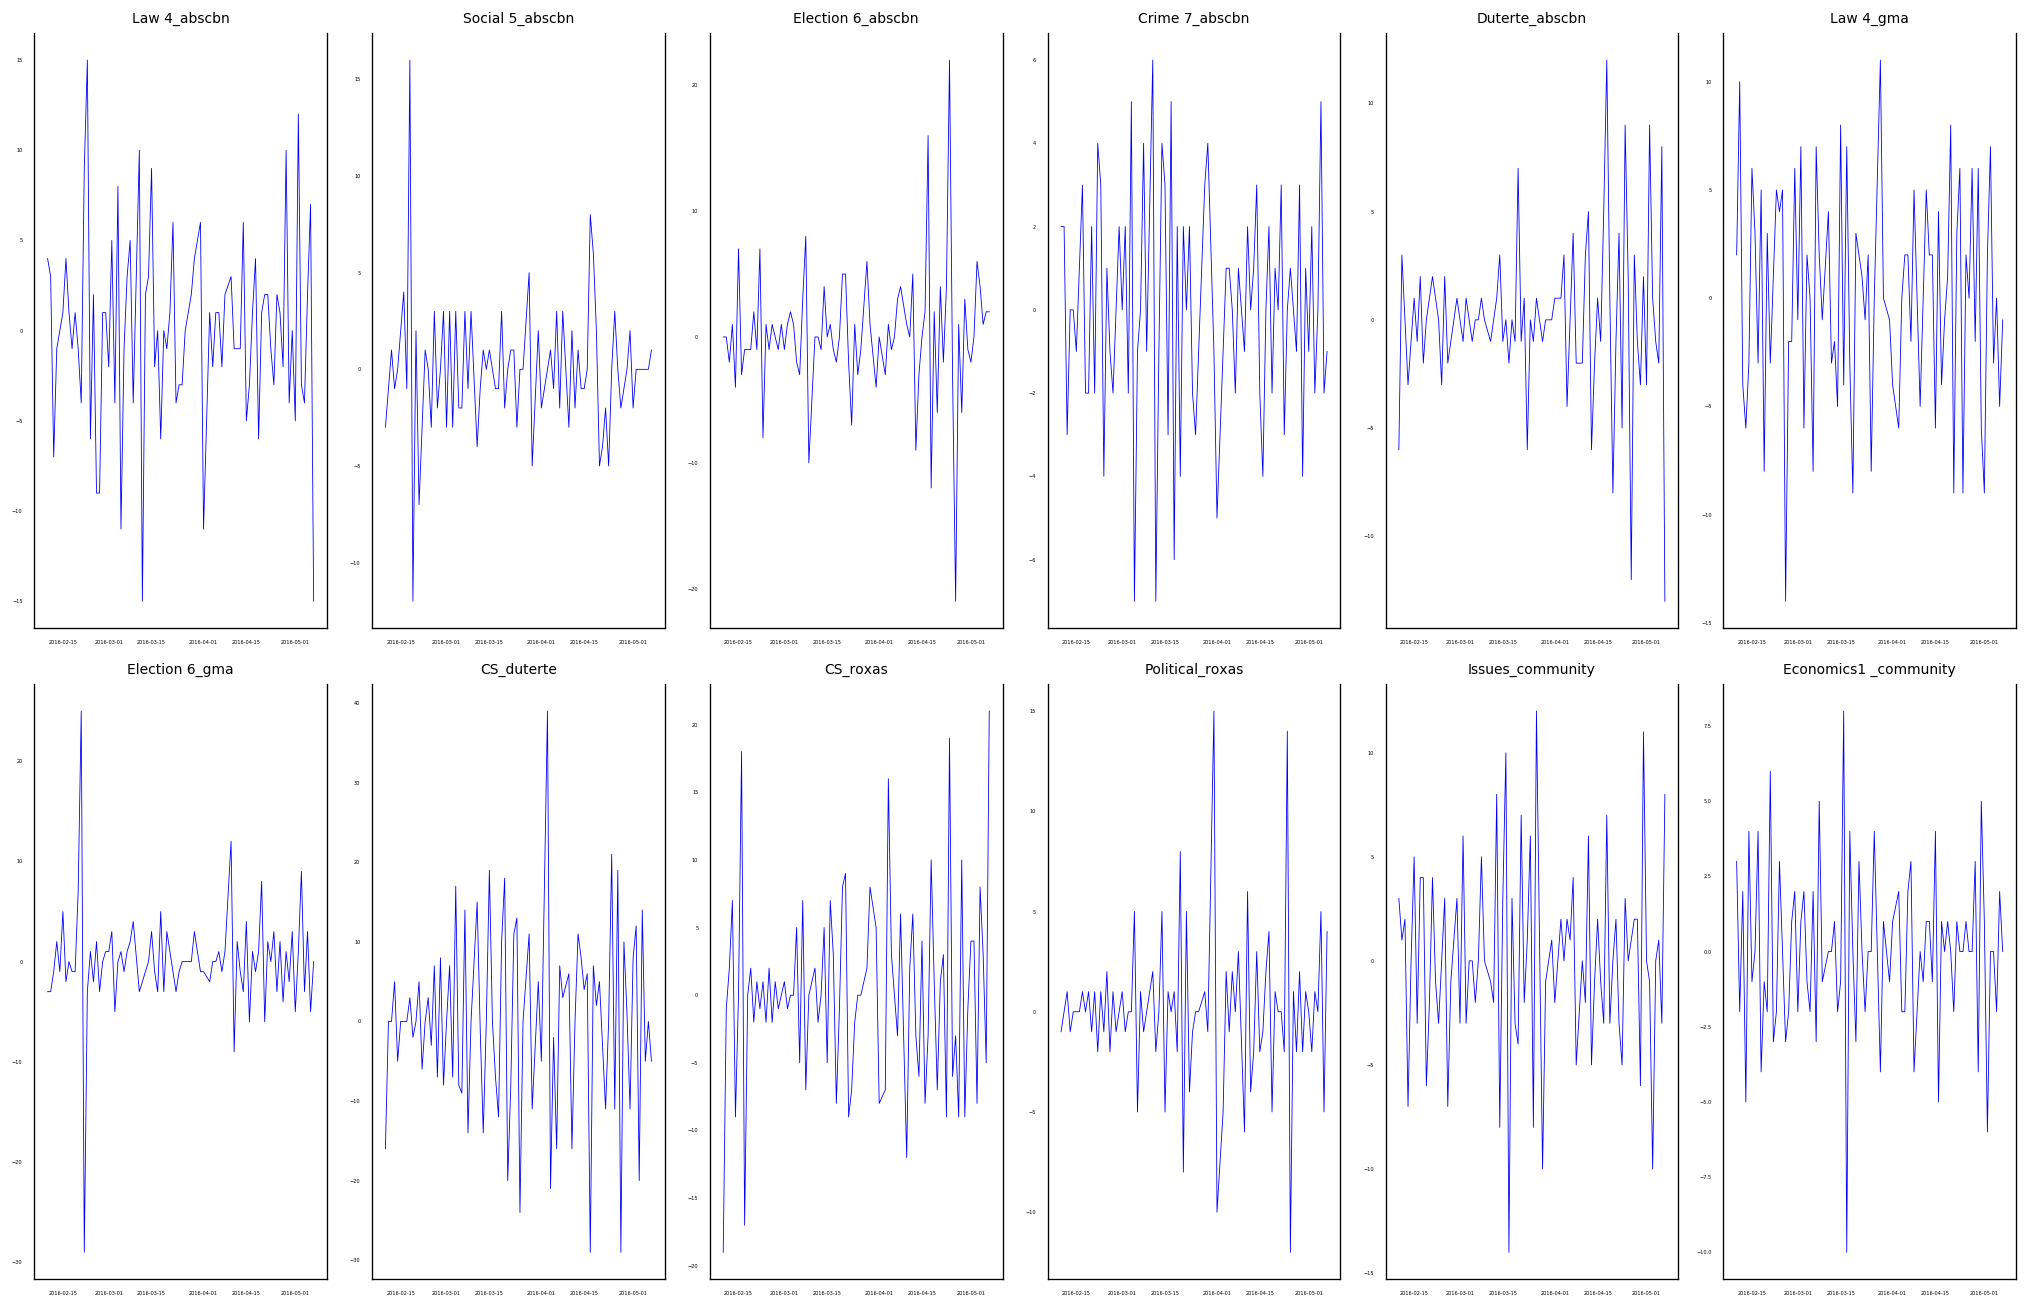

In [ ]:
# Step 12: Visualize the new series
fig, axes = plt.subplots(nrows=2, ncols=6, dpi=120, figsize=(17,11))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df_differenced[df_differenced.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df_differenced.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=3)

plt.tight_layout();

In [ ]:
model = VAR(df_differenced)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,34.17,34.55,6.930e+14,34.32
1,32.70,37.67,1.675e+14,34.68
2,31.55,41.11,7.316e+13,35.35
3,30.63,44.78,7.851e+13,36.26
4,27.21,45.95,2.926e+13,34.67
5,-56.66,-33.33,7.647e-21,-47.39
6,-728.1,-700.1,0.000*,-717.0
7,-736.0,-703.5*,0.000,-723.0
8,-740.4*,-703.3,0.000,-725.6*
9,-739.1,-697.4,0.000,-722.5


In [ ]:
#Step 13: Check Granger Causality of all possible combinations of the None-Stationary Time series.
#The rows are the response variable, columns are predictors. The values in the table are the P-Values.

maxlag=8
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_differenced, variables = df_differenced.columns)

#Interpretation:
#P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the X does not cause Y can be rejected.
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
#For example, P-Value of 0.4930 at (row 1, column 5) represents the p-value of the Grangers Causality test for Law 4_gma_x causing Law 4_abscbn_y,
# but since it is higher than the significance level of 0.05 we cannot reject the null hypothesis and we can say that Law 4_gma_x does not cause Law 4_abscbn_y.
#But the P-Value of 0.0000 at (row 5, column 1) represents the p-value of the Grangers Causality test for causing Law 4_abscbn_x causing Law 4_gma_y,
# since it is lesser than the significance level of 0.05 we reject the null hypothesis and we can say that Law 4_abscbn_x causing Law 4_gma_y.
#Looking at the P-Values in the table, there are some variables that are interchangeably causing each other.

NameError: ignored

In [ ]:
#Step 14: Test for Cointegration Using Johansen Cointegration Test for None Stationary Time Series
#The Johansen cointegration test helps find any integration relationship in the long-run between variables.
#If there are no cointegrated vectors, then some result in the Granger Causality test maybe a "spurious relationship" then there is a need to apply vector error correction approach.
#If there are cointegrated vectors, then the results in the Granger Causality Test is not Spurious and VAR modeling is applicable.
#Time-series data often appear nonstationary and also tend to comove. A set of nonstationary series that are cointegrated implies existence of a long-run equilibrium relation. If such an equlibrium does not exist, then the apparent comovement is spurious and no meaningful interpretation ensues.
# see https://blog.stata.com/2016/09/06/cointegration-or-spurious-regression/
def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,1)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 1): return str(val).ljust(length)


    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_differenced)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Law 4_abscbn ::  1027.9    > 311.1288  =>   True
Social 5_abscbn ::  850.69    > 263.2603  =>   True
Election 6_abscbn ::  693.87    > 219.4051  =>   True
Crime 7_abscbn ::  576.32    > 179.5199  =>   True
Duterte_abscbn ::  471.69    > 143.6691  =>   True
Law 4_gma ::  375.04    > 111.7797  =>   True
Election 6_gma ::  293.66    > 83.9383   =>   True
CS_duterte ::  228.25    > 60.0627   =>   True
CS_roxas ::  169.61    > 40.1749   =>   True
Political_roxas ::  114.25    > 24.2761   =>   True
Issues_community ::  69.35     > 12.3212   =>   True
Economics1 _community ::  31.54     > 4.1296    =>   True
